In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utility

## 1. Collecting the data

In [2]:
train = pd.read_csv('data/train.csv', sep=';')

## 2. Exploring the data

In [3]:
train.head()

,id,implant,date,article_nom,id_categorie_6,qte_article_vendue,id_categorie_5,id_categorie_4,cat6_nom,cat5_nom,...,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
0,39fc404102d5,NF059473,2016-01-01,Cookie Cara Noix Pecan 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,...,0,0,0,0,0,0,0,0,0,0
1,aa697ce32b43,NF059473,2016-01-01,Cookie Choc Blc 70G Michel Augustin,1001672,"1,11",1001664,1001639,Patiss PréEmballé,Patisserie,...,0,0,0,0,0,0,0,0,0,0
2,291a469e1b50,NF059473,2016-01-01,Cookie Choc Nois 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,...,0,0,0,0,0,0,0,0,0,0
3,2dbc07dbc8f0,NF059473,2016-01-01,Cookie Choco 70G Michel Augustin,1001672,"0,56",1001664,1001639,Patiss PréEmballé,Patisserie,...,0,0,0,0,0,0,0,0,0,0
4,e664714361d6,NF059473,2016-01-01,Croissant 60G Cuit/Place Neuhauser,1001674,"4,08",1001665,1001639,Vienn cuit/place,Viennoiserie,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(198288, 39)

In [5]:
train.describe()

,id_categorie_6,id_categorie_5,id_categorie_4,aller_zone_1,aller_zone_2,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
count,1.982880e+05,1.982880e+05,1.982880e+05,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000,198288.000000
mean,1.001765e+06,1.001714e+06,1.001681e+06,0.156379,0.106996,0.113169,0.158436,0.102881,0.113169,0.076132,0.059671,0.063786,0.080247,0.057613,0.072016
std,3.137463e+01,1.897058e+01,1.387801e+01,0.467274,0.386065,0.397461,0.514804,0.381831,0.397461,0.308265,0.284257,0.290533,0.332934,0.273625,0.322285
min,1.001669e+06,1.001663e+06,1.001639e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001762e+06,1.001707e+06,1.001683e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.001770e+06,1.001715e+06,1.001684e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.001782e+06,1.001727e+06,1.001687e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.001794e+06,1.001739e+06,1.001692e+06,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000


In [6]:
#Checking for null values
train.isnull().sum()

id                    0
implant               0
date                  0
article_nom           0
id_categorie_6        0
qte_article_vendue    0
id_categorie_5        0
id_categorie_4        0
cat6_nom              0
cat5_nom              0
cat4_nom              0
t_9h_rouen            0
n_9h_rouen            0
rr3_9h_rouen          0
ff_9h_rouen           0
t_15h_rouen           0
n_15h_rouen           0
rr3_15h_rouen         0
ff_15h_rouen          0
t_9h_paris            0
n_9h_paris            0
rr3_9h_paris          0
ff_9h_paris           0
t_15h_paris           0
n_15h_paris           0
rr3_15h_paris         0
ff_15h_paris          0
aller_zone_1          0
aller_zone_2          0
aller_zone_3          0
aller_zone_4          0
aller_zone_5          0
aller_zone_6          0
retour_zone_1         0
retour_zone_2         0
retour_zone_3         0
retour_zone_4         0
retour_zone_5         0
retour_zone_6         0
dtype: int64

### DataType mismatch correction
   <p>The decimal point separator of some columns, such as 'n_9h_rouen' and 'qte_article_vendue', is ',' (comma) instead of '.'</p> This should be corrected to avoid any conflicts later.

In [7]:
# extracting all columns with type 'object'
object_columns = list(train.select_dtypes('object').columns)
# removing the columns that do not represent a float such as 'id' and 'date'
str_columns = ['id', 'implant', 'date', 'article_nom', 'cat6_nom', 'cat5_nom', 'cat4_nom']
# columns to correct
columns_to_correct = list(set(object_columns) - set(str_columns))

# correcting the columns with the correct_column function from 'utility' module
for column in columns_to_correct:
    train[column] = utility.correct_column(train[column])

In [8]:
train.info()
# the columns have been successfully updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198288 entries, 0 to 198287
Data columns (total 39 columns):
id                    198288 non-null object
implant               198288 non-null object
date                  198288 non-null object
article_nom           198288 non-null object
id_categorie_6        198288 non-null int64
qte_article_vendue    198288 non-null float64
id_categorie_5        198288 non-null int64
id_categorie_4        198288 non-null int64
cat6_nom              198288 non-null object
cat5_nom              198288 non-null object
cat4_nom              198288 non-null object
t_9h_rouen            198288 non-null float64
n_9h_rouen            198288 non-null float64
rr3_9h_rouen          198288 non-null float64
ff_9h_rouen           198288 non-null float64
t_15h_rouen           198288 non-null float64
n_15h_rouen           198288 non-null float64
rr3_15h_rouen         198288 non-null float64
ff_15h_rouen          198288 non-null float64
t_9h_paris            198288

### Date mapping (whether or not it's a holiday )
<p>date = 1 if it's holiday, 0 otherwise</p>
<p>The public_holidays.csv file contains all public holidays in France between 01/01/2016 and 01/04/2017</p>

In [9]:
holidays = pd.read_csv('public_holidays.csv', header=None)
holidays.columns = ['days']
train = utility.map_holidays(train, holidays)

## 3. Data visualization 
<p> Plots of sales by some features to get some insights</p>

In [10]:
utility.get_categories_info(train)

Feature 'id' has 198288 unique categories
Feature 'implant' has 2 unique categories
Feature 'article_nom' has 204 unique categories
Feature 'cat6_nom' has 22 unique categories
Feature 'cat5_nom' has 21 unique categories
Feature 'cat4_nom' has 8 unique categories


### 3.1 Sales by station

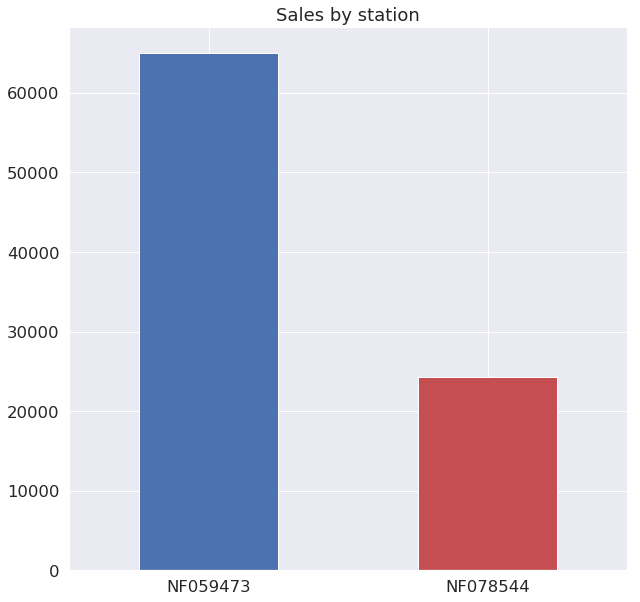

In [11]:
# plot of sales by each implant
implants = train['implant'].unique() # extracting the implants values
sales_1 = train[train['implant']==implants[0]]['qte_article_vendue'].sum()
sales_2 = train[train['implant']==implants[1]]['qte_article_vendue'].sum()

df = pd.DataFrame([sales_1, sales_2])
df.index = implants
df[0].plot.bar(figsize=(10., 10.), title='Sales by station', legend=False, color=('b', 'r'))
a = plt.xticks(rotation='horizontal')

### 3.2 Sales in each station during holidays


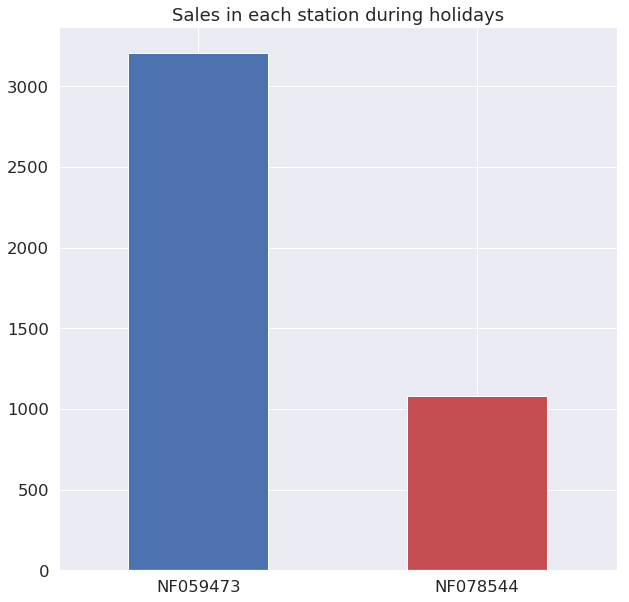

In [12]:
implants = train['implant'].unique() # extracting the implants values
sales_holidays_1 = train[(train['implant']==implants[0]) & (train['vacances']==1)]['qte_article_vendue'].sum()
sales_holidays_2 = train[(train['implant']==implants[1]) & (train['vacances']==1)]['qte_article_vendue'].sum()

df = pd.DataFrame([sales_holidays_1, sales_holidays_2])
df.index = implants
df[0].plot.bar(figsize=(10., 10.), title='Sales in each station during holidays', legend=False, color=('b', 'r'))
a = plt.xticks(rotation='horizontal')

### 3.3 Comparing sales in regular days and holidays in each station


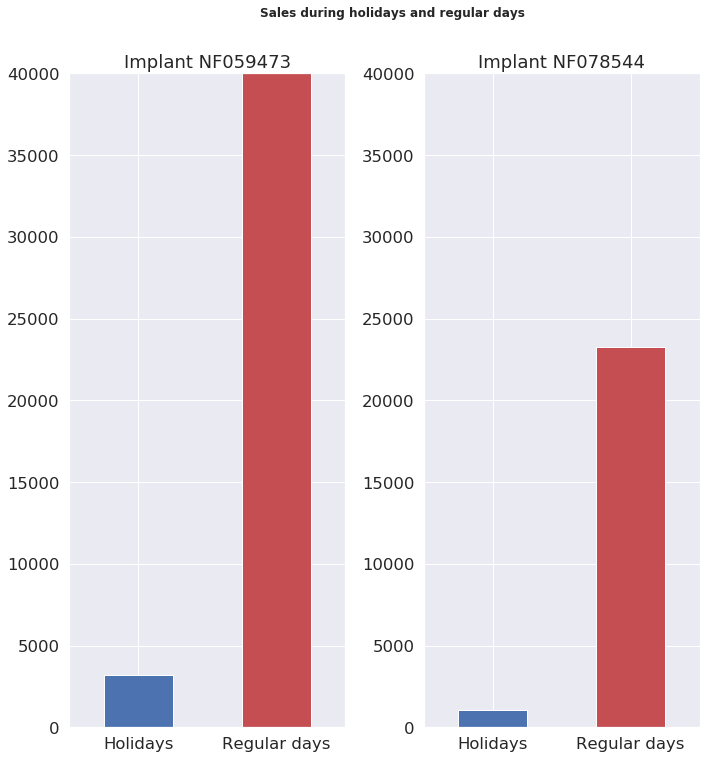

In [13]:
implants = train['implant'].unique() # extracting the implants values
sales_holidays_1 = train[(train['implant'] == implants[0]) & (train['vacances'] == 1)]['qte_article_vendue'].sum()
sales_regular_1 = train[(train['implant'] == implants[0]) & (train['vacances'] == 0)]['qte_article_vendue'].sum()

sales_holidays_2 = train[(train['implant'] == implants[1]) & (train['vacances'] == 1)]['qte_article_vendue'].sum()
sales_regular_2 = train[(train['implant'] == implants[1]) & (train['vacances'] == 0)]['qte_article_vendue'].sum()

plot_lim = 40000
#==============PLOTTING=====================================
fig = plt.figure()
fig.suptitle('Sales during holidays and regular days', fontweight='bold', x=0.55, y=1.05)
#Implant 'NF059473'
plt.subplot(121)
df = pd.DataFrame([sales_holidays_1, sales_regular_1])
df.index = ['Holidays', 'Regular days']
df[0].plot.bar(figsize=(10., 10.), title='Implant {}'.format(implants[0]), legend=False, color=('b', 'r'), ylim=[0, plot_lim])
a = plt.xticks(rotation='horizontal')
#Implant 'NF078544'
plt.subplot(122)
df = pd.DataFrame([sales_holidays_2, sales_regular_2])
df.index = ['Holidays', 'Regular days']
df[0].plot.bar(figsize=(10., 10.), title='Implant {}'.format(implants[1]), legend=False, color=('b', 'r'), ylim=[0, plot_lim])
a = plt.xticks(rotation='horizontal')
fig.tight_layout()


### 3.4 Sales by 'cat4_nom' feature

#### 3.4.1 In all stations

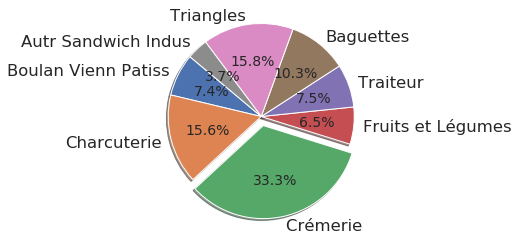

In [14]:
cat4 = train['cat4_nom'].unique()
sales_by_cat4 = list()
for cat in cat4:
    sales_by_cat4.append(train[train['cat4_nom'] == cat]['qte_article_vendue'].sum())

# Data to plot
labels = cat4
sizes = sales_by_cat4
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  
# Plot
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
 
plt.axis('equal')
plt.show()

#### 3.4.2 In each station

In [15]:
sales_by_cat4_1 = list()
sales_by_cat4_2 = list()
for cat in cat4:
    sales_by_cat4_1.append(train[(train['implant'] == implants[0]) & (train['cat4_nom'] == cat)]['qte_article_vendue'].sum())
    sales_by_cat4_2.append(train[(train['implant'] == implants[1]) & (train['cat4_nom'] == cat)]['qte_article_vendue'].sum())


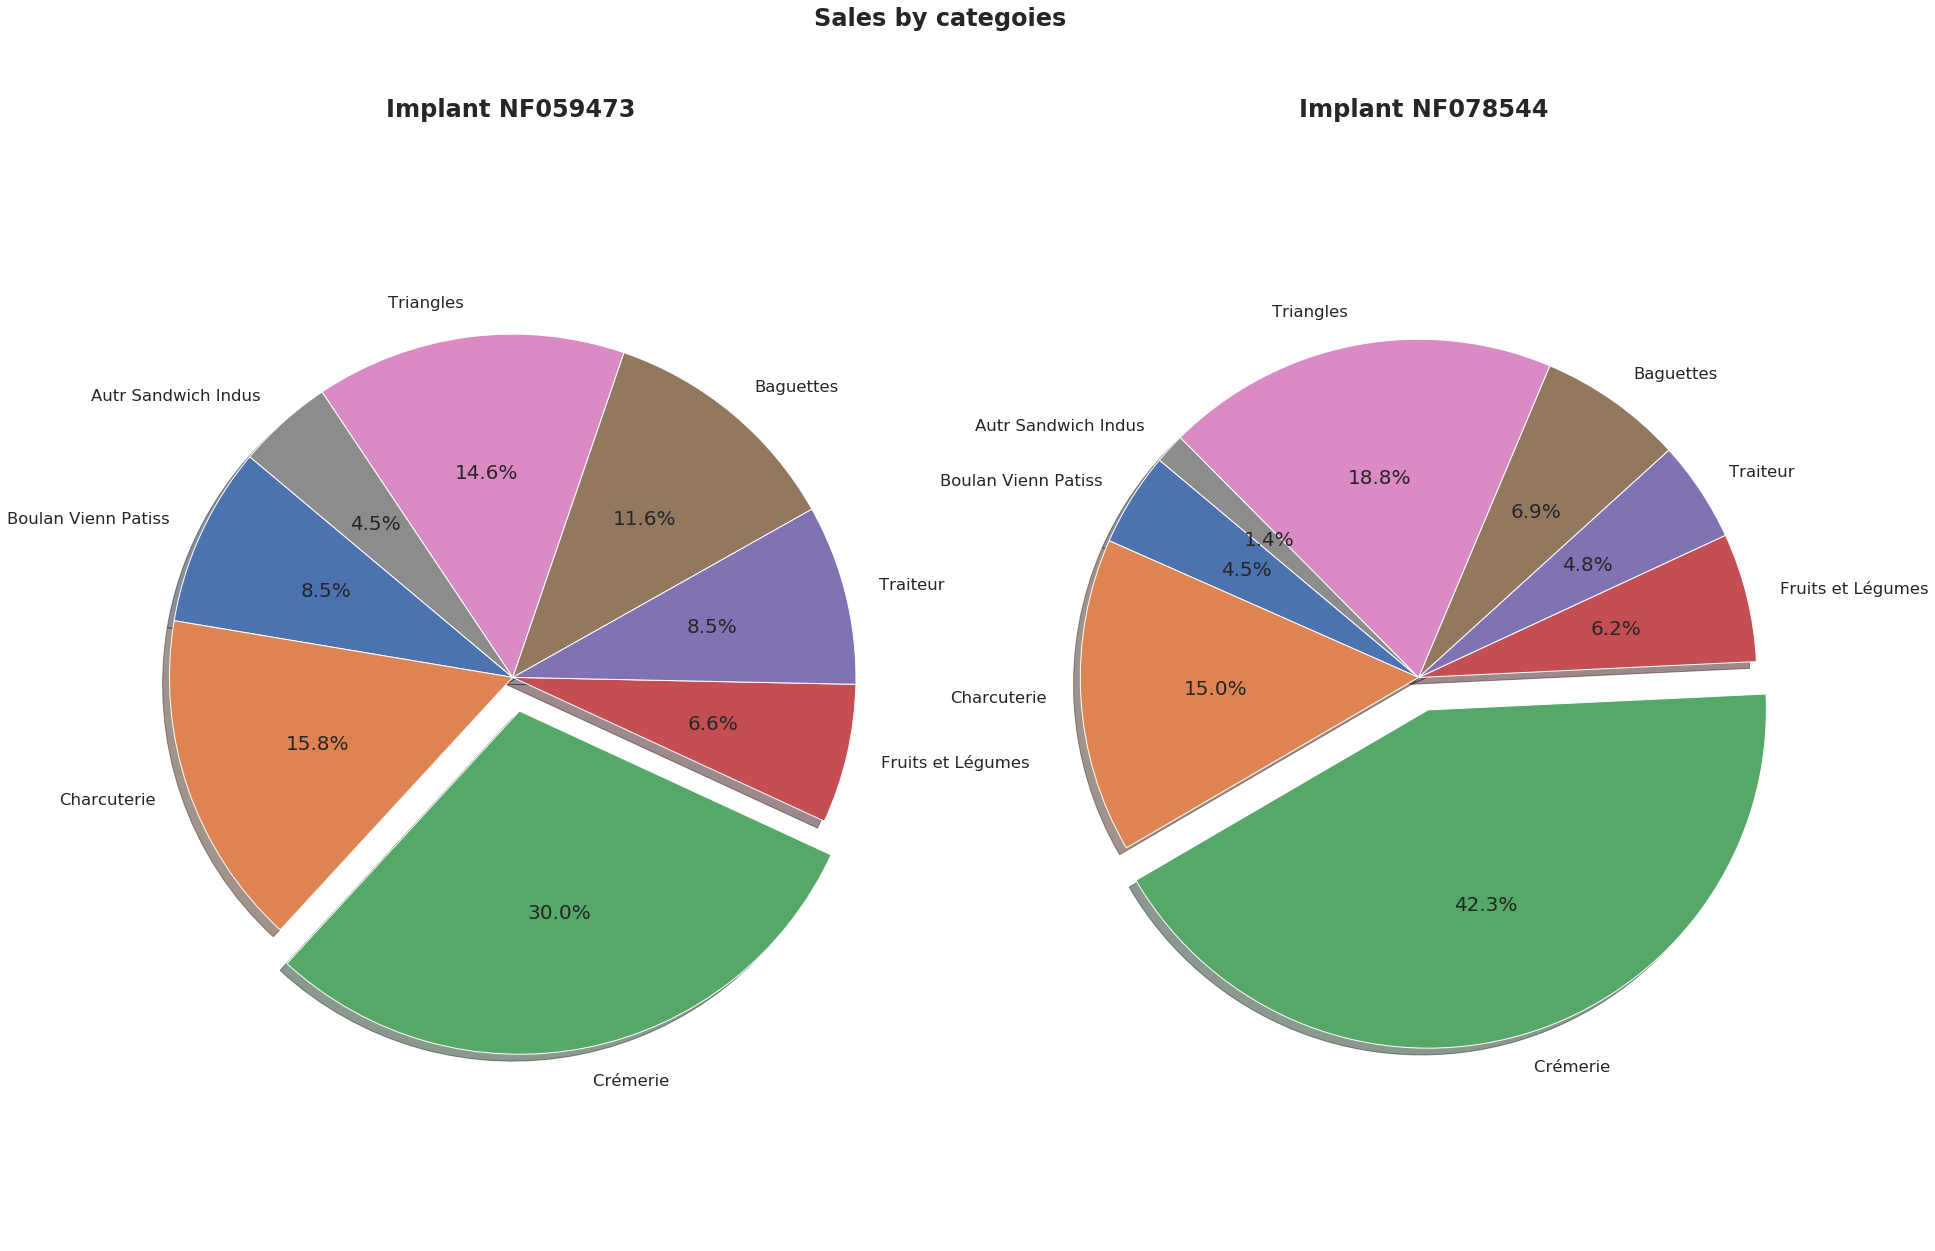

In [16]:
#first row, first col
fig = plt.figure(figsize=(30,20))
fig.suptitle('Sales by categoies', fontweight='bold', fontsize=24)
labels = cat4
explode = (0, 0, 0.1, 0, 0, 0, 0, 0)  

ax1 = plt.subplot2grid((1,2),(0,0))
sizes_1 = sales_by_cat4_1
plt.pie(sizes_1, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 20})
plt.axis('equal')
plt.title('Implant {}\n'.format(implants[0]), fontsize=24, fontweight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2), (0, 1))
fig.fontsize = 24
sizes_2 = sales_by_cat4_2
plt.pie(sizes_2, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 20})
plt.axis('equal')
plt.title('Implant {}\n'.format(implants[1]), fontsize=24, fontweight='bold')

plt.show()

## 4. Features selection
<p>We're going to work with 'implant', 'cat4_nom' and 'vacances' </p>

In [17]:
train.columns

Index(['id', 'implant', 'article_nom', 'id_categorie_6', 'qte_article_vendue',
       'id_categorie_5', 'id_categorie_4', 'cat6_nom', 'cat5_nom', 'cat4_nom',
       't_9h_rouen', 'n_9h_rouen', 'rr3_9h_rouen', 'ff_9h_rouen',
       't_15h_rouen', 'n_15h_rouen', 'rr3_15h_rouen', 'ff_15h_rouen',
       't_9h_paris', 'n_9h_paris', 'rr3_9h_paris', 'ff_9h_paris',
       't_15h_paris', 'n_15h_paris', 'rr3_15h_paris', 'ff_15h_paris',
       'aller_zone_1', 'aller_zone_2', 'aller_zone_3', 'aller_zone_4',
       'aller_zone_5', 'aller_zone_6', 'retour_zone_1', 'retour_zone_2',
       'retour_zone_3', 'retour_zone_4', 'retour_zone_5', 'retour_zone_6',
       'vacances'],
      dtype='object')

In [18]:
features = ['implant','vacances','cat4_nom', 'qte_article_vendue','t_9h_rouen', 'n_9h_rouen', 'rr3_9h_rouen', 'ff_9h_rouen',
       't_15h_rouen', 'n_15h_rouen', 'rr3_15h_rouen', 'ff_15h_rouen',
       't_9h_paris', 'n_9h_paris', 'rr3_9h_paris', 'ff_9h_paris',
       't_15h_paris', 'n_15h_paris', 'rr3_15h_paris', 'ff_15h_paris',
       'aller_zone_1', 'aller_zone_2', 'aller_zone_3', 'aller_zone_4',
       'aller_zone_5', 'aller_zone_6', 'retour_zone_1', 'retour_zone_2',
       'retour_zone_3', 'retour_zone_4', 'retour_zone_5', 'retour_zone_6']
final_train = train[features] # The final dataset that we're going to work with
final_train.head()

,implant,vacances,cat4_nom,qte_article_vendue,t_9h_rouen,n_9h_rouen,rr3_9h_rouen,ff_9h_rouen,t_15h_rouen,n_15h_rouen,...,aller_zone_3,aller_zone_4,aller_zone_5,aller_zone_6,retour_zone_1,retour_zone_2,retour_zone_3,retour_zone_4,retour_zone_5,retour_zone_6
0,NF059473,1,Boulan Vienn Patiss,0.56,278.25,100.0,0.2,4.0,280.05,100.0,...,0,0,0,0,0,0,0,0,0,0
1,NF059473,1,Boulan Vienn Patiss,1.11,278.25,100.0,0.2,4.0,280.05,100.0,...,0,0,0,0,0,0,0,0,0,0
2,NF059473,1,Boulan Vienn Patiss,0.56,278.25,100.0,0.2,4.0,280.05,100.0,...,0,0,0,0,0,0,0,0,0,0
3,NF059473,1,Boulan Vienn Patiss,0.56,278.25,100.0,0.2,4.0,280.05,100.0,...,0,0,0,0,0,0,0,0,0,0
4,NF059473,1,Boulan Vienn Patiss,4.08,278.25,100.0,0.2,4.0,280.05,100.0,...,0,0,0,0,0,0,0,0,0,0


<p><b>Quick update to 'cat4_nom'</b></p>
<p>Since we've seen in the data visualization part (Paragraph 3.4) that the most sold categories are 'Crémerie ', 'Charcuterie', 'Triangles', this update consists of creating a new category named 'Autre', in which we're going to dump any product that doesn't belong to these most sold categories.</p>

In [19]:
for index, row in final_train.iterrows():
    if not final_train.iloc[index]['cat4_nom'] in ['Crémerie ', 'Charcuterie', 'Triangles']:
        final_train.at[index, 'cat4_nom'] = 'Autre'

<p><b>Dummy coding of categorical features</b></p>

In [20]:
todummy_list = ['implant', 'cat4_nom'] # Categorical features to convert into numerical
final_train = utility.dummy_df(final_train, todummy_list)
final_train.shape

(198288, 36)

In [21]:
# extracting the predictors and the target
y = final_train['qte_article_vendue']
X = final_train.drop('qte_article_vendue', 1)

## 5. Model training

### 5.1 train test split

In [22]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

#### 5.1.1 Linear regression

The Root Mean Squared Error of this model, in the training phase, over 100 iterations is:  0.8138912678980468
The Root Mean Squared Error of this model, in the test phase, over 100 iterations is:  0.8154515242306537


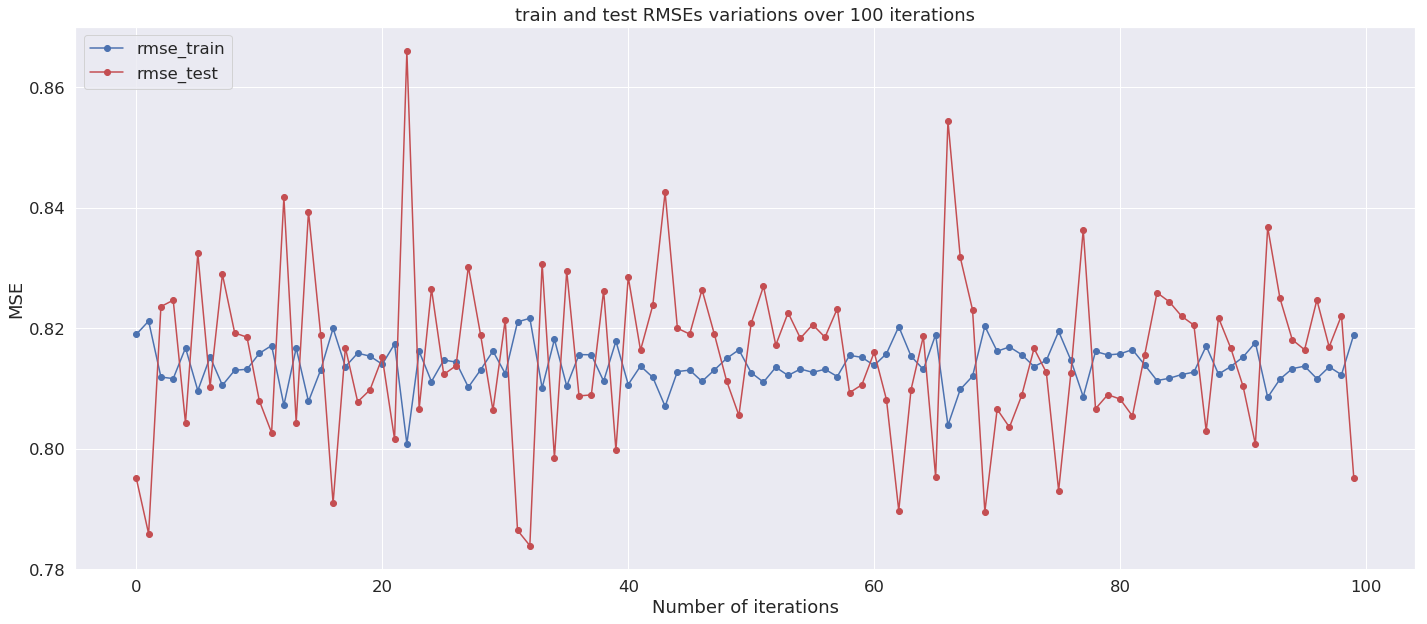

In [28]:
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (24, 10)
results_train = list()
results_test = list()

max_iter = 100
for i in range(max_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    predictions_train = regressor.predict(X_train)  # to check for overfitting
    predictions_test = regressor.predict(X_test)

    rmse_train = math.sqrt(abs(mse(y_train, predictions_train)))
    rmse_test = math.sqrt(abs(mse(y_test, predictions_test)))

    results_train.append(rmse_train)
    results_test.append(rmse_test)

plt.plot(range(max_iter), results_train, 'bo-', label='rmse_train')
plt.plot(range(max_iter), results_test, 'ro-', label='rmse_test')
plt.legend(loc='upper left')
plt.title(
    'train and test RMSEs variations over {} iterations'.format(max_iter))
plt.xlabel('Number of iterations')
plt.ylabel('MSE')

print(
    'The Root Mean Squared Error of this model, in the training phase, over 100 iterations is: ',
    np.mean(results_train))
print(
    'The Root Mean Squared Error of this model, in the test phase, over 100 iterations is: ',
    np.mean(results_test))

#### 5.1.2 Neural Nets

In [25]:
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results_train = list()
results_test = list()
regressor = MLPRegressor(activation='logistic', solver='lbfgs')
regressor.fit(X_train, y_train)

predictions_train = regressor.predict(X_train)
predictions_test = regressor.predict(X_test)

rmse_train = math.sqrt(abs(mse(y_train, predictions_train)))
rmse_test = math.sqrt(abs(mse(y_test, predictions_test)))

In [26]:
print('The Root Mean Squared Error of this model, in the training phase, is: ', rmse_train)
print('The Root Mean Squared Error of this model, in the test phase, is: ', rmse_test)

The Root Mean Squared Error of this model, in the training phase, is:  0.8303409041489829
The Root Mean Squared Error of this model, in the test phase, is:  0.8266206544780969


#### 5.1.3 Random forests

In [29]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
results_train = list()
results_test = list()
nb_estimators = 20  # We're going to start with 20 estimators
max_nb_estimators = 100
step = 20

for nb_estim in range(nb_estimators, max_nb_estimators + step, step):
    regressor = RandomForestRegressor(n_estimators=nb_estim)
    regressor.fit(X_train, y_train)

    predictions_train = regressor.predict(X_train)
    predictions_test = regressor.predict(X_test)

    rmse_train = math.sqrt(abs(mse(y_train, predictions_train)))
    rmse_test = math.sqrt(abs(mse(y_test, predictions_test)))

    results_train.append(rmse_train)
    results_test.append(rmse_test)

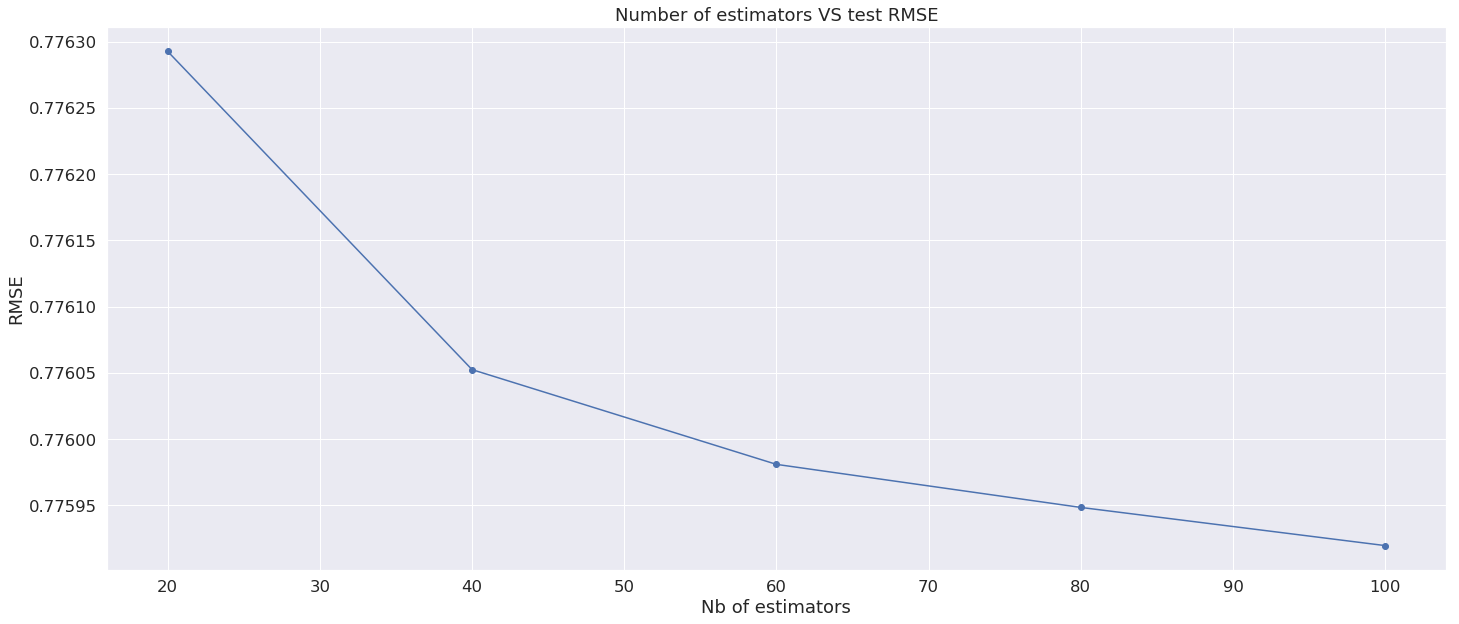

In [30]:
plt.plot(range(nb_estimators, max_nb_estimators + step, step), results_train, 'o-')
plt.title('Number of estimators VS test RMSE')
plt.xlabel('Nb of estimators')
plt.ylabel('RMSE')
plt.show()

<p>The optimal number of estimators is 100.</p>

### 5.2 cross validation

In [31]:
from sklearn.model_selection import cross_val_score, KFold
y_cross = final_train['qte_article_vendue']
X_cross = final_train.drop('qte_article_vendue', 1)

#### 5.2.1 Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
k_fold = KFold(n_splits=10, shuffle=True)
regressor = LinearRegression()
scores = cross_val_score(
    regressor,
    X_cross,
    y_cross,
    scoring='neg_mean_squared_error',
    cv=k_fold)

# This will print the mean of the list of errors that were output and
# provide your metric for evaluation
rmses = [math.sqrt(abs(scores[i])) for i in range(len(scores))]
rmse = np.mean(rmses)

print('RMSE of this model is: ', rmse)

RMSE of this model is:  0.81427451706158


#### 5.2.2 Random Forests

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
k_fold = KFold(n_splits=10, shuffle=True)
regressor = RandomForestRegressor()
scores = cross_val_score(
    regressor,
    X_cross,
    y_cross,
    scoring='neg_mean_squared_error',
    cv=k_fold)

# This will print the mean of the list of errors that were output and
# provide your metric for evaluation
rmses = [math.sqrt(abs(scores[i])) for i in range(len(scores))]
rmse = np.mean(rmses)

print('RMSE of this model is: ', rmse)

/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/whitenoise/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/whitenoise/anaconda3/l

RMSE of this model is:  0.7996714894146917


#### 5.2.3 Neural Nets

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
k_fold = KFold(n_splits=10, shuffle=True)
regressor = MLPRegressor()
scores = cross_val_score(
    regressor,
    X_cross,
    y_cross,
    scoring='neg_mean_squared_error',
    cv=k_fold)

# This will print the mean of the list of errors that were output and
# provide your metric for evaluation
rmses = [math.sqrt(abs(scores[i])) for i in range(len(scores))]
rmse = np.mean(rmses)

print('RMSE of this model is: ', rmse)

RMSE of this model is:  0.8742057886746478
